# ML-for-AE: Homework 0 
## Executing Code and Simple Linear Regression

In this homework, we will get started with Python and analyze a simple dataset. We will study a *Convection-Duffsion-Reaction* problem which considers how a premixed flame moves and reacts within a chamber. What we're interested in is the maximum temperature observed in that chamber under different conditions. The details of this scenario aren't critical to understanding and completing this homework. 

### General Homework Policies 
* You must not import any python libraries unless the question explicitly asks you to do so. 
* Some exercises may have a free response question at the end. We are not looking for anything more than a short paragraph for these questions. In some cases, just a sentence will suffice. 

## Exercise 1: Loading a Spreadsheet with Pandas (Again)

Like Homework0, load the `CDRSamples.csv` dataset into your Jupyter notebook using the `pandas` library, which is widely used throughout the data-science world. This will load this `.csv` (which stands for comma-separated values) table into your notebook as a "DataFrame" object. This is a useful structure for manipulating spreadsheets programmatically. To receive full credit for this exercise, you must: 

- Import the `pandas` library and name it `pd` so we don't have to type out the whole name each time we use it. 
- Assign the `CDRSamples.csv` file as a Pandas Dataframe to a variable called `df`. 
- Print the number of rows contained in this dataframe. 
- Display the first 5 rows of the dataset using the `.head()` method on the `df` variable

In [7]:
# 1.) Import the "pandas" library and name it "pd" so we don't have to call the whole name each time we use it
import pandas as pd 

# 2.) Assign the 'CDRSamples.csv' file as a Pandas Dataframe to a variable called "df"
df = pd.read_csv("CDRSamples.csv")

# 3.) Print the number of rows in the dataframe 
print("Number of Rows: %d" % (len(df)))

# 4.) Display the first 5 rows of the dataset using the .head() method on the "df" variable 
df.head()

Number of Rows: 120000


,A,E,Ti,To,phi,T_max
0,0.222878,5088.944077,326.976714,947.452301,0.647133,1081.116584
1,0.112300,7461.429319,256.857257,975.464063,1.056249,1262.945975
2,0.004896,1513.376459,324.362214,915.987019,1.465834,1686.078741
3,0.277023,2469.082289,369.753997,970.686809,1.169102,1621.811163
4,0.239761,3434.308095,338.511066,978.108594,0.553839,1090.002244


## Exercise 2: Preparing the Dataset 

As we can see from the first few rows of the dataset, each row represents a unique selection of our input variables and the corresponding maximum temperature associated with those input variables. These inputs will be called "features". Features are observable traits of the system that we feed in as inputs to a machine learning model. The input features we'll be using are: 

* **A** and **E** are paremeters of the Arrhenius Equation (scaled for numerical stability), which determines the rate of reaction's dependence on temperature. 
* **Ti** is the temperature at the inlet of the chamber. 
* **To** is the temperature at the outlet of the chamber. 
* **phi** is the fuel:oxidizer ratio of the premixed inflow. 

The output we'll be using is: 
* **T_max** is the maximum temperature observed in the chamber. 

Our goal of this exercise is to use linear regression to predict the maximum temperature in the chamber, **T_max**, given we know **A, E, Ti, To** and **phi**. To get credit for this exercise you must: 

- Create a new DataFrame called `X_df` that only contains the input features (**A, E, Ti, To** and **phi**). 
- Create a new DataFrame named `Y_df` of only the **T_max** column. 

In [8]:
# 1.) Create a new DataFrame named `X_df` of only the input features of the dataframe
X_df = df[['A', 'E', 'Ti', 'To', 'phi']]

# 2.) Create a new DataFrame named `Y_df` of only the `T_max` column. 
Y_df = df[['T_max']]

## Exercise 3: For-Loops and NumPy 

In Python, the main library for working with Matrices, Vectors and Linear Algebra is called "NumPy". This is a powerful library whose internals are mostly written in C, a much more efficient (but much harder to learn and interpret) programming language than Python. You will encounter this trend often; Python is extremely flexible and readible, but is often orders of magnitude slower than other compiled languages. 

We are interested in how much each feature is correlated with our output-of-interest, the maximum temperature (**T_max**). To get full-credit for this exercise, you must: 

* Import the `numpy` library and rename it `np`. 
* Use a `for` loop to print out the feature name and its pearson correlation coefficient ($R$) for each of the input features with the maximum temperature (**T_max**). *Hint: you may find the `df.columns` attribute useful* 

In [9]:
# Import numpy library and rename it 'np' 
import numpy as np 

# Loop through the features of X_df and print out the feature name and correlation coefficient for each 
for feature in X_df.columns: 
    print("Correlation Coefficient for %s: %.3f" % (feature, np.corrcoef(X_df[feature], Y_df['T_max'])[0,1]))


Correlation Coefficient for A: 0.340
Correlation Coefficient for E: -0.265
Correlation Coefficient for Ti: 0.036
Correlation Coefficient for To: 0.152
Correlation Coefficient for phi: 0.882


### **Free Response:** Consider these correlation coefficients. Which feature will be most helpful in predicting maximum temperature? Which feature will be the least helpful? Why? 

*Your response here*

## Exercise 4: Matrices in Python: 

With this in mind, in this question, we will solve for a set of weights that solve the following least-squares regression problem: 


$$ \min_{\beta} ||X \beta - Y||_2^2 $$ 

Where $X \in \mathbb{R}^{N \times d}$, $\beta \in \mathbb{R}^{d}$ and $Y \in \mathbb{R}^{N}$. $N$ is the number of observations we have and $d$ is the number of features we have for each observation. The optimal $\beta$ value, i.e. the weights that optimally map the features of $X$ to the output $Y$ can be computed with the "normal equations" (we'll discuss this problem in much more detail in class, this exercise is just to get you familiar with matrix operations using NumPy): 

$$ \hat{\beta} = (X^\top X)^{-1} X^\top Y $$ 

In this exercise, we will compute $\hat{\beta}$ using NumPy. To receive credit for this question, you must: 

- Convert the `X` and `Y` dataframes into 2D Numpy Arrays (matrices) called `X` and `Y`
- Compute `beta_hat` using the second equation above. Use `np.linalg.inv()` to compute the matrix inverse and use `@` for matrix multiplication. 
- Print `beta_hat`

*NOTE: Make sure your matrix dimensions are correct when you multiply $X^\top X$. This should result in a 5x5 matrix. If you accidentally multiply $X X^\top$, this will result in a 120,000 x 120,000 matrix which may exceed the memory of your machine.* 

In [10]:
# 1.) Convert X_df and Y_df Dataframes into Numpy Arrays called X and Y
X = X_df.values
Y = Y_df.values

# 2.) Compute beta_hat using the normal equations 
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y 

# 3.) Print beta_hat 
print(beta_hat)

[[ 3.23706441e+02]
 [-3.12749145e-02]
 [ 1.18116759e-01]
 [ 5.85118168e-01]
 [ 8.31302630e+02]]


## Exercise 5: Error Metrics

A crucial part of machine learning is developing a series of metrics that tell how a model has performed. In the case of regression, we are interested in how "close" the model's predictions come to the true values. One way to check this error is with *Mean-Squared Error*. This is computed with the following equation: 

$$ MSE = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2 $$ 

where $N$ is the total number of datapoints, $\hat{y}_i$ is the model's prediction for a specific input, and $y_i$ is the true output at that input. 

To get credit for this exercise, you must: 

- Compute a `Y_hat` variable with the following expression: $ X \hat{\beta} = \hat{Y}$; this is the model's best guess at maximum temperature given the features of $X$. 
- Define a function called `compute_mse` which takes two parameters, `Y_pred` and `Y_true`, which are numpy vectors of the same length and returns the mean squared error between them.
- Call the function on your `Y_hat` vector you computed in the first step and the `Y` vector. Print the Mean Squared Error between these two vectors. 

In [11]:
# Compute a Y_hat variable using your beta_hat variable from the previous sections 
Y_hat = X @ beta_hat 

# Define a function compute_mse that takes Y_pred and Y_true as parameters and returns the MSE between them: 
def compute_mse(Y_pred, Y_true):
    Y_diff = (Y_pred - Y_true)**2 
    N = len(Y_diff) 
    
    return np.sum(Y_diff) / N 

# Print the MSE of the model's predictions, Y_hat and the true values stored in the vector Y 
print("Model's Mean Squared Error: %.3f" %  compute_mse(Y_hat, Y))

Model's Mean Squared Error: 1739.136


### **Free Response:** In your own words, interpret this value. What does this say about how good or bad our regression is? 

*Your response here*

## Exercise 6: Visualizing Model Performance

Oftentimes, it is useful to visualize the performance of a machine learning model to intuitively gauge how well the model has predicted the target values. 

* Import the `matplotlib.pyplot` module and rename it `plt` 
* Use `matplotlib` to plot a scatterplot of the `Y_hat`, or our model's predicted values on the X-Axis and `Y`, the true output values on the Y-Axis. Make the size of the points 0.5. 
* Add a grid, appropriate axis labels and a title to your plot 

Text(0.5, 1.0, 'Actual Max Temp vs. Predicted Max Temp')

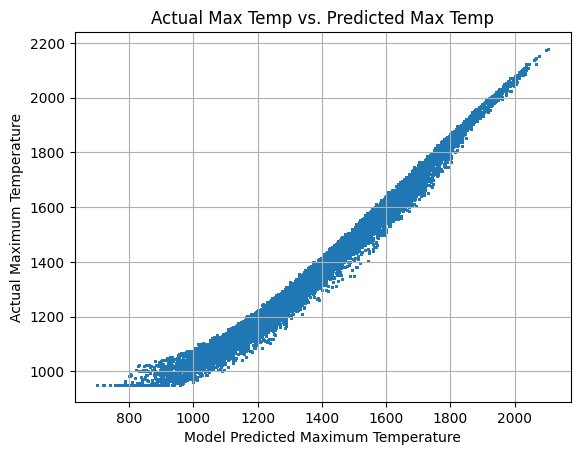

In [16]:
# Import the matplotlib.pyplot module and rename it 'plt' 
import matplotlib.pyplot as plt 

# PLot a scatterplot of Y_hat on the X-Axis and Y on the Y-Axis with appropriate sizing and labeling  
plt.scatter(Y_hat, Y, s = 0.5)
plt.grid()
plt.xlabel("Model Predicted Maximum Temperature")
plt.ylabel("Actual Maximum Temperature")
plt.title("Actual Max Temp vs. Predicted Max Temp")

### **Free Response:** Describe how well the linear regression model is able to predict the maximum temperature. If the model performs perfectly (i.e. it 100% matches the true output values), how would this scatterplot look? If the model performs poorly (i.e. encounters high error in its predictions), how would it look?

*Your response here*

## Exercise 7: Cross-Validation

The model's mean squared error is a good metric to assess model performance, but by itself, it doesn't mean much. What we are interested in is how well the model *generalizes* to unseen data. This is the process of **Cross-Validation**. We have provided some code to take the `X_df` and `Y_df` and split them into "Train" and "Test" sets. The `test_size=0.20` argument means we will hold out 20% of our data from the training process to evaluate the model on unseen data. We will train our model on the training data, and then evaluate how well our model performs on the "Test" data. To get credit for this exercise, you must: 

* Compute a new `beta_hat` only using the training dataframes, like we did in **Exercise 4**. 
* Use the training `beta_hat` to compute `Yhat_train` and `Yhat_test` arrays. (Like we did in **Exercise 5**). 
* Use your MSE function in **Exercise 5** to compute variables called `train_mse` and `test_mse`, the Mean Squared Error of the training data and the MSE of the testing data. Print out your results. 

In [27]:
## CODE PROVIDED; DO NOT MODIFY ---------------------

# Importing Scikit-Learn library's train_test_split function 
from sklearn.model_selection import train_test_split

# Splitting the X_df and Y_df into training and testing pairs with 20% of the data being held out for testing 
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.20, random_state=42)

# Converting these from pandas dataframes into numpy arrays 
X_train, X_test, Y_train, Y_test = X_train.values, X_test.values, Y_train.values, Y_test.values

## BEGIN YOUR CODE: ---------------------------------

# Compute a new beta_hat using only the training data 
beta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train 

# Compute Yhat_train and Yhat_test arrays (i.e. model's predictions on X_train and X_test)
Yhat_train = X_train @ beta_hat 
Yhat_test = X_test @ beta_hat 

# Use the MSE function from Exercise 5 to compute train_mse and test_mse 
train_mse = compute_mse(Yhat_train, Y_train)
test_mse = compute_mse(Yhat_test, Y_test)
print("Training Mean Squared Error: %.3f" % (train_mse))
print("Testing  Mean Squared Error: %.3f" % (test_mse))

Training Mean Squared Error: 1741.318
Testing  Mean Squared Error: 1730.420


### **Free Response:** What do the MSE Values for the train and test-set tell you? Has our model done a good job of generalizing to unseen data? 

*Your response here*

## Exercise 8: Cross-Validation with Polynomial Features

Because the model fit the data pretty well, we are now going to examine what happens when we add too many features. The provided code does a few things. First, we are only using 100 total datapoints. Second, we're going to add polynomial features up to order 3, using the `sklearn` library. This means that instead of simply having our parameters A, E, Ti, To, and Tmax as features, we will use every combination of these up to cubic nonlinearity (e.g. $AE^2$, $T_i^3$, $A T_o T_{max}$, etc). With nonlinear features, we are now able to capture nonlinear relationships between our features. 

To get credit for this exercise, please do exactly what you did in **Exercise 7** on this new dataset. 

In [28]:
## CODE PROVIDED; DO NOT MODIFY ---------------------

# Importing Scikit-Learn functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 

# Defining how many datapoints to use in our analysis 
n_datapoints = 100

# Splitting the X_df and Y_df into training and testing pairs with 20% of the data being held out for testing 
X_train, X_test, Y_train, Y_test = train_test_split(X_df.loc[:n_datapoints,:], Y_df.loc[:n_datapoints,:], test_size=0.20, random_state=42)

# Converting these from pandas dataframes into numpy arrays 
X_train, X_test, Y_train, Y_test = X_train.values, X_test.values, Y_train.values, Y_test.values

# Generating polynomial features up to order 3 on the training/testing inputs 
poly_features = PolynomialFeatures(degree=3)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.transform(X_test)

## BEGIN YOUR CODE: ---------------------------------

# Compute a new beta_hat using only the training data 
beta_hat = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train 

# Compute Yhat_train and Yhat_test arrays (i.e. model's predictions on X_train and X_test)
Yhat_train = X_train @ beta_hat 
Yhat_test = X_test @ beta_hat 

# Use the MSE function from Exercise 5 to compute train_mse and test_mse 
train_mse = compute_mse(Yhat_train, Y_train)
test_mse = compute_mse(Yhat_test, Y_test)
print("Training Mean Squared Error: %.3f" % (train_mse))
print("Testing  Mean Squared Error: %.3f" % (test_mse))

Training Mean Squared Error: 1.850
Testing  Mean Squared Error: 83.218


### **Free Response:** How does the nonlinear model compare to the linear model? What do the MSE Values for the train and test-set tell us? Explain what you think might be going on here. (Hint: What dimension is `beta_hat` now?)

*Your response here*